# Shapely


In [ ]:
import matplotlib.pyplot as plt
import pyproj
from shapely import Point, Polygon
from shapely.ops import transform


plt.rcParams["figure.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0
plt.rcParams["axes.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0

1.0
4.0
(0.0, 0.0, 1.0, 1.0)
POINT (0.5 0.5)
POINT (0.5 0.5)
LINEARRING (0 0, 1 0, 1 1, 0 1, 0 0)
(array('d', [0.0, 1.0, 1.0, 0.0, 0.0]), array('d', [0.0, 0.0, 1.0, 1.0, 0.0]))


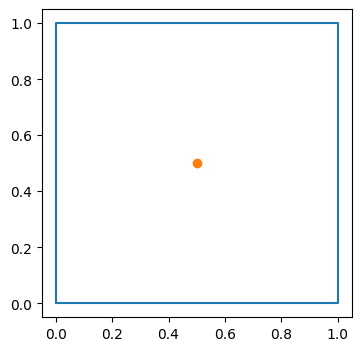

In [ ]:
pol1 = Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

print(pol1.area)
print(pol1.length)
print(pol1.bounds)
print(pol1.centroid)
print(pol1.representative_point())
print(pol1.exterior)
print(pol1.exterior.xy)


fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(*pol1.exterior.xy)
ax.plot(*pol1.centroid.xy, "o")
# ax.set_aspect('equal')
plt.show()


In [ ]:
def set_limits(ax, x0, xN, y0, yN):
    ax.set_xlim(x0, xN)
    ax.set_xticks(range(x0, xN + 1))
    ax.set_ylim(y0, yN)
    ax.set_yticks(range(y0, yN + 1))
    ax.set_aspect("equal")


In [ ]:
from shapely.plotting import plot_polygon, plot_points

In [ ]:
plot_polygon??

Signature:
plot_polygon(
    polygon,
    ax=None,
    add_points=True,
    color=None,
    facecolor=None,
    edgecolor=None,
    linewidth=None,
    **kwargs,
)
Source:   
def plot_polygon(
    polygon,
    ax=None,
    add_points=True,
    color=None,
    facecolor=None,
    edgecolor=None,
    linewidth=None,
    **kwargs
):
    """
    Plot a (Multi)Polygon.

    Note: this function is experimental, and mainly targetting (interactive)
    exploration, debugging and illustration purposes.

    Parameters
    ----------
    polygon : shapely.Polygon or shapely.MultiPolygon
    ax : matplotlib Axes, default None
        The axes on which to draw the plot. If not specified, will get the
        current active axes or create a new figure.
    add_points : bool, default True
        If True, also plot the coordinates (vertices) as points.
    color : matplotlib color specification
        Color for both the polygon fill (face) and boundary (edge). By default,
        the fill is using 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from shapely.geometry import Polygon
import numpy as np


def plot_shapely_polygon(polygon, ax=None, **kwargs):
    if isinstance(polygon, Polygon):
        polygons = [polygon]
    else:
        polygons = list(polygon.geoms)

    for polygon in polygons:
        exterior_coords = np.array(polygon.exterior.coords)
        interior_coords = [np.array(ring.coords) for ring in polygon.interiors]

        codes = [Path.MOVETO]
        codes.extend([Path.LINETO] * (len(exterior_coords) - 2))
        codes.append(Path.CLOSEPOLY)

        for ring in interior_coords:
            codes.append(Path.MOVETO)
            codes.extend([Path.LINETO] * (len(ring) - 2))
            codes.append(Path.CLOSEPOLY)

        all_coords = np.vstack([exterior_coords] + interior_coords)

        path = Path(all_coords, codes)
        patch = PathPatch(path, **kwargs)
        ax.add_patch(patch)


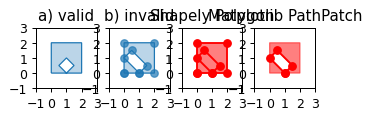

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(4, 16), dpi=90)

ext = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
int = [(1, 0), (0.5, 0.5), (1, 1), (1.5, 0.5), (1, 0)][::-1]
polygon = Polygon(ext, [int])


plot_polygon(polygon, ax=axes[0], add_points=False)
# plot_points(polygon, ax=axes[0], alpha=0.7)

axes[0].set_title("a) valid")

set_limits(axes[0], -1, 3, -1, 3)

ext = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
int = [(1, 0), (0, 1), (0.5, 1.5), (1.5, 0.5), (1, 0)][::-1]
polygon = Polygon(ext, [int])

plot_polygon(polygon, ax=axes[1], add_points=False)
plot_points(polygon, ax=axes[1], alpha=0.7)

axes[1].set_title("b) invalid")

set_limits(axes[1], -1, 3, -1, 3)


x, y = polygon.exterior.xy

axes[2].fill(x, y, alpha=0.5, fc="r")
axes[2].plot(x, y, marker="o", color="r")

for interior in polygon.interiors:
    x, y = interior.xy
    axes[2].fill(x, y, alpha=0, fc=(1, 1, 1, 0))  # fill with white to create a hole effect
    axes[2].plot(x, y, marker="o", color="r")

# Customize plot
axes[2].set_title("Shapely Polygon")

set_limits(axes[2], -1, 3, -1, 3)

exterior_coords = np.array(polygon.exterior.coords)
interior_coords = [np.array(ring.coords) for ring in polygon.interiors]

codes = [Path.MOVETO]
codes.extend([Path.LINETO] * (len(exterior_coords) - 2))
codes.append(Path.CLOSEPOLY)

for ring in interior_coords:
    codes.append(Path.MOVETO)
    codes.extend([Path.LINETO] * (len(ring) - 2))
    codes.append(Path.CLOSEPOLY)

all_coords = np.vstack([exterior_coords] + interior_coords)

path = Path(all_coords, codes)
patch = PathPatch(path, facecolor="r", edgecolor="r", alpha=0.5)
axes[3].add_patch(patch)

axes[3].plot(x, y, marker="o", color="r")

axes[3].set_title("Matplotlib PathPatch")

set_limits(axes[3], -1, 3, -1, 3)

plt.show()


In [ ]:
all_coords

array([[0. , 0. ],
       [0. , 2. ],
       [2. , 2. ],
       [2. , 0. ],
       [0. , 0. ],
       [1. , 0. ],
       [1.5, 0.5],
       [0.5, 1.5],
       [0. , 1. ],
       [1. , 0. ]])

## Transforms


In [ ]:
wgs84_pt = Point(-72.2495, 43.886)

wgs84 = pyproj.CRS("EPSG:4326")
utm = pyproj.CRS("EPSG:32618")

project = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True).transform
utm_point = transform(project, wgs84_pt)

utm_point.xy


(array('d', [720944.1103566973]), array('d', [4862889.031679545]))